In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_excel("../data/sods_processado.xlsx")

#### Agrupando Cargos

In [3]:
mapeamento = {
    'Perfis Técnicos de Dados': [
        'Cientista de Dados/Data Scientist',
        'Analista de Dados/Data Analyst',
        'Analista de BI/BI Analyst',
        'Analytics Engineer',
        'Engenheiro de Machine Learning/ML Engineer',
        'Estatístico',
        'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
        'DBA/Administrador de Banco de Dados',
        'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas'
    ],

    'Perfis de Negócios e Outras Áreas': [
        'Analista de Negócios/Business Analyst',
        'Analista de Inteligência de Mercado/Market Intelligence',
        'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
        'Analista de Marketing',
        'Economista',
        'Professor',
        'Outras Engenharias (não inclui dev)',
        'Analista de Suporte/Analista Técnico',
        'Outra Opção'
    ]
}


# Invertendo o dicionário para poder usar o método .map()
mapeamento_invertido = {cargo: grupo for grupo, cargos in mapeamento.items() for cargo in cargos}

# Aplicando o mapeamento para criar a nova coluna de grupos
df['cargo'] = df['cargo'].map(mapeamento_invertido)

In [4]:
df.head(5)

,idade,pcd,vive_no_brasil,cargo,genero_Feminino,genero_Masculino,genero_Prefiro não informar,etnia_Amarela,etnia_Branca,etnia_Indígena,...,progress,python.1,sap,search_engines,sql.1,sqlite,sqlserver,sybase,time_series,web_apis
0,0.583333,0.0,1,Perfis Técnicos de Dados,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.972222,0.0,1,Perfis Técnicos de Dados,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.250000,0.0,1,Perfis Técnicos de Dados,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.777778,0.0,1,Perfis Técnicos de Dados,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.388889,0.0,1,Perfis de Negócios e Outras Áreas,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns.to_list()

['idade',
 'pcd',
 'vive_no_brasil',
 'cargo',
 'genero_Feminino',
 'genero_Masculino',
 'genero_Prefiro não informar',
 'etnia_Amarela',
 'etnia_Branca',
 'etnia_Indígena',
 'etnia_Outra',
 'etnia_Parda',
 'etnia_Prefiro não informar',
 'etnia_Preta',
 'formacao_Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde',
 'formacao_Ciências Sociais',
 'formacao_Computação / Engenharia de Software / Sistemas de Informação/ TI',
 'formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios',
 'formacao_Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
 'formacao_Marketing / Publicidade / Comunicação / Jornalismo',
 'formacao_Outra opção',
 'formacao_Outras Engenharias',
 'formacao_Prefiro não informar',
 'formacao_Química / Física',
 'cloud_preferida_Amazon Web Services (AWS)',
 'cloud_preferida_Azure (Microsoft)',
 'cloud_preferida_Google Cloud (GCP)',
 'cloud_preferida_Não sei opinar',
 'cloud_preferida_Outra Cloud',
 'estado_moradia_Alagoas (AL)',
 'esta

In [6]:
X = df.drop('cargo', axis=1) 
y = df['cargo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

In [7]:
tre = DecisionTreeClassifier(random_state=42,max_depth=200,min_samples_leaf=5,min_samples_split=20)
tre.fit(X=X_train,y=y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,200
,min_samples_split,20
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
y_tre = tre.predict(X_test)

In [9]:
print(classification_report(y_test,y_tre))

                                   precision    recall  f1-score   support

         Perfis Técnicos de Dados       0.84      0.94      0.89       702
Perfis de Negócios e Outras Áreas       0.61      0.33      0.42       193

                         accuracy                           0.81       895
                        macro avg       0.72      0.63      0.65       895
                     weighted avg       0.79      0.81      0.79       895



In [10]:
accuracy_Decision = accuracy_score(y_test,y_tre)


In [11]:
import matplotlib.pyplot as plt

[Text(0.8992683069029851, 0.9782608695652174, 'tempo_experiencia_dados_Não tenho experiência na área de dados <= 0.5\ngini = 0.338\nsamples = 2086\nvalue = [1637, 449]'),
 Text(0.8241229677505331, 0.9347826086956522, 'aws <= 0.5\ngini = 0.286\nsamples = 1967\nvalue = [1627, 340]'),
 Text(0.861695637326759, 0.9565217391304348, 'True  '),
 Text(0.7335337819829424, 0.8913043478260869, 'nao_uso <= 0.5\ngini = 0.342\nsamples = 1389\nvalue = [1085, 304]'),
 Text(0.6440398454157783, 0.8478260869565217, 'formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios <= 0.5\ngini = 0.329\nsamples = 1349\nvalue = [1069, 280]'),
 Text(0.5455423773987207, 0.8043478260869565, 'access <= 0.5\ngini = 0.3\nsamples = 1117\nvalue = [912, 205]'),
 Text(0.4684834754797441, 0.7608695652173914, 'big_data <= 0.5\ngini = 0.285\nsamples = 1065\nvalue = [882, 183]'),
 Text(0.3868603411513859, 0.717391304347826, 'data_lakes <= 0.5\ngini = 0.304\nsamples = 926\nvalue = [753, 173]'),
 Text(0.325959488272921

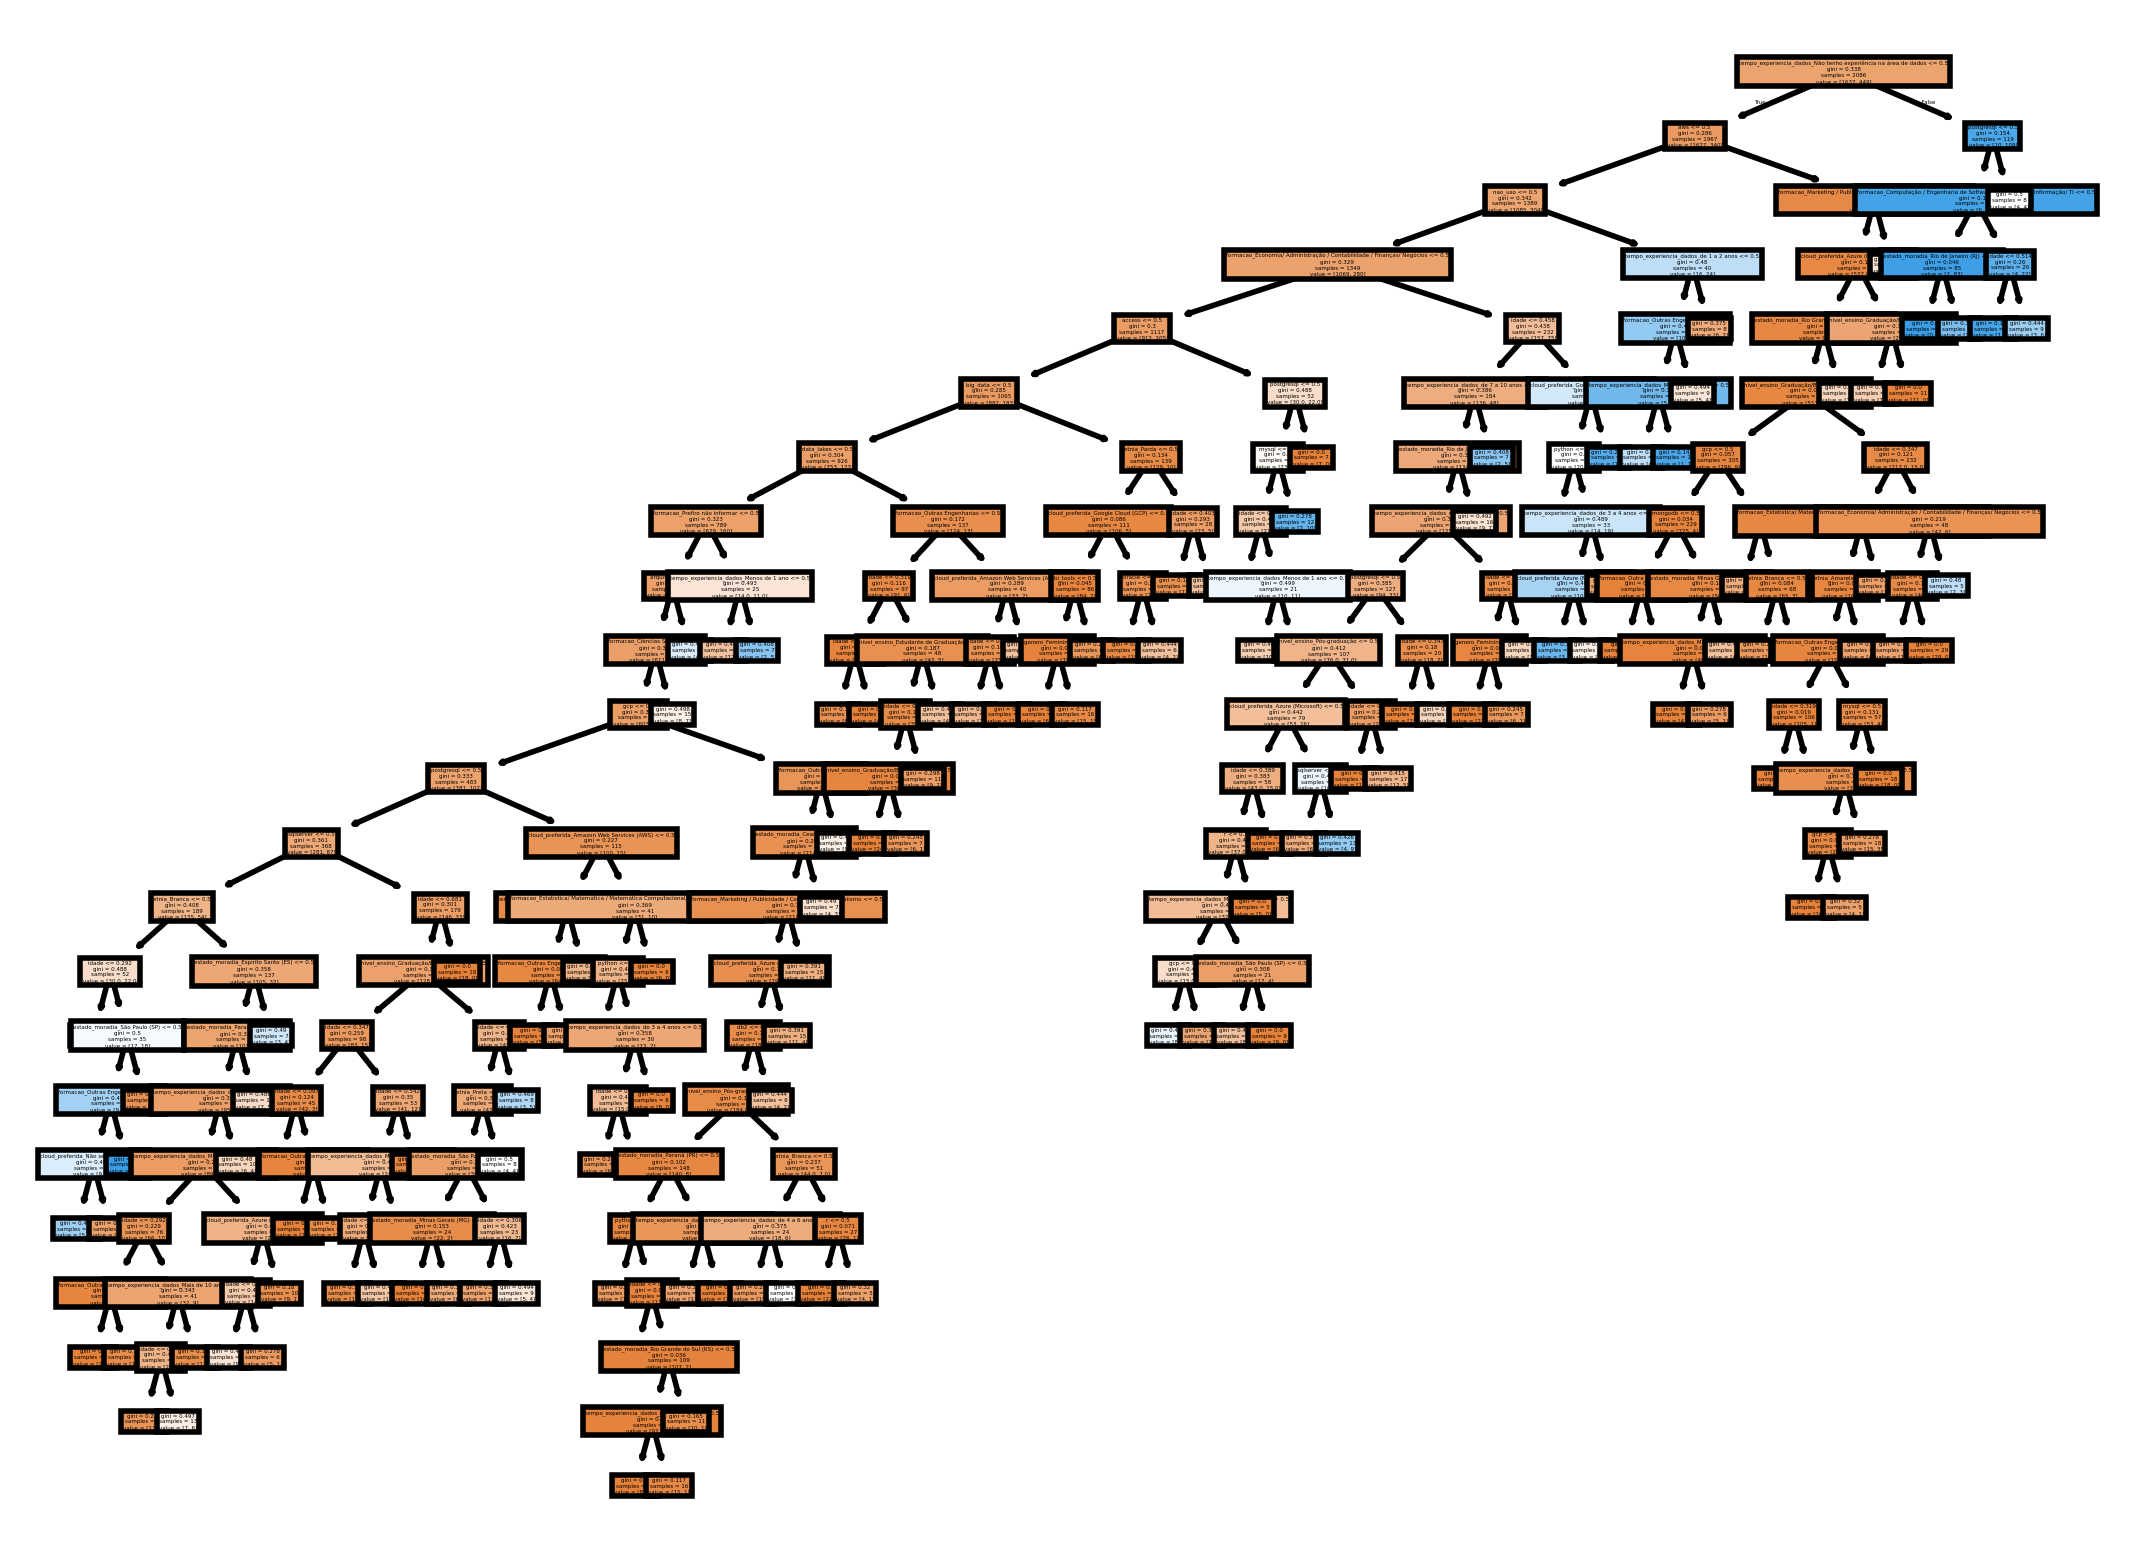

In [12]:
plt.figure(dpi=400)

tree.plot_tree(tre, feature_names=X.columns,  filled=True )

In [13]:
importances = tre.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

                                               feature  importance
60   tempo_experiencia_dados_Não tenho experiência ...    0.375286
0                                                idade    0.104934
91                                                 aws    0.060605
120                                            nao_uso    0.036235
16   formacao_Economia/ Administração / Contabilida...    0.030348
..                                                 ...         ...
129                                     search_engines    0.000000
131                                             sqlite    0.000000
133                                             sybase    0.000000
134                                        time_series    0.000000
135                                           web_apis    0.000000

[136 rows x 2 columns]


In [14]:
feature_importance_df.head(5)

,feature,importance
60,tempo_experiencia_dados_Não tenho experiência ...,0.375286
0,idade,0.104934
91,aws,0.060605
120,nao_uso,0.036235
16,formacao_Economia/ Administração / Contabilida...,0.030348


In [15]:
rdf = RandomForestClassifier(criterion='gini',max_depth=200,min_samples_split=5,min_samples_leaf=5, random_state=42)

In [16]:
feature_selecionadas = ['tempo_experiencia_dados_Não tenho experiência na área de dados', 'idade', 'aws', 'nao_uso','formacao_Economia/ Administração / Contabilidade / Finanças/ Negócios']

In [17]:
X_selecionados = X[feature_selecionadas]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selecionados, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

In [19]:
rdf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,200
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_rdf = rdf.predict(X_test)

In [21]:
print(classification_report(y_test,y_rdf))

                                   precision    recall  f1-score   support

         Perfis Técnicos de Dados       0.83      0.98      0.90       702
Perfis de Negócios e Outras Áreas       0.78      0.27      0.40       193

                         accuracy                           0.83       895
                        macro avg       0.80      0.62      0.65       895
                     weighted avg       0.82      0.83      0.79       895



In [22]:
accuracy_Random = accuracy_score(y_test,y_rdf)

In [23]:
acuracia_modelos =pd.DataFrame ({
    'Modelo': ['Randon Forest', 'Decision Tree'],
    'Acurácia': [accuracy_Random, accuracy_Decision]
})

acuracia_modelos

,Modelo,Acurácia
0,Randon Forest,0.825698
1,Decision Tree,0.808939
